<a href="https://colab.research.google.com/github/Muhammad-Usama-07/DeepLearning-Work/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [2]:
from keras.datasets import boston_housing


# Loading Data

In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


# Shape of Data

In [4]:
print('train data shape:',train_data.shape)
print('train data shape:', test_data.shape)


train data shape: (404, 13)
train data shape: (102, 13)


#  Normalizing data

In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std


# Defining model 

In [7]:
from keras import models
from keras import layers
def build_model():
 # Because we will need to instantiate
 # the same model multiple time,
 # we use a function to construct it.
 model = models.Sequential()
 model.add(layers.Dense(64, activation='relu',
 input_shape=(train_data.shape[1],)))
 model.add(layers.Dense(64, activation='relu'))
 model.add(layers.Dense(1))
 model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
 return model

#  Applying K-fold validation

In [8]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
 print('processing fold #', i)
 # Prepare the validation data: data from partition # k
 val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
 val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
 # Prepare the training data: data from all other partitions
 partial_train_data = np.concatenate(
 [train_data[:i * num_val_samples],
 train_data[(i + 1) * num_val_samples:]],
 axis=0)
 partial_train_targets = np.concatenate(
 [train_targets[:i * num_val_samples],
 train_targets[(i + 1) * num_val_samples:]],
 axis=0)
 # Build the Keras model (already compiled)
 model = build_model()
 # Train the model (in silent mode, verbose=0)
 model.fit(partial_train_data, partial_train_targets,
 epochs=num_epochs, batch_size=1, verbose=0)
 # Evaluate the model on the validation data
 val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
 all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# Getting Score

In [9]:
all_scores

[2.025602102279663, 2.4427120685577393, 2.7117130756378174, 2.466538906097412]

In [10]:
 np.mean(all_scores)

2.411641538143158

# Saving the validation logs at each fold

In [13]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
 print('processing fold #', i)
 # Prepare the validation data: data from partition # k
 val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
 val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
 # Prepare the training data: data from all other partitions
 partial_train_data = np.concatenate(
 [train_data[:i * num_val_samples],
 train_data[(i + 1) * num_val_samples:]],
 axis=0)
 partial_train_targets = np.concatenate(
 [train_targets[:i * num_val_samples],
 train_targets[(i + 1) * num_val_samples:]],
 axis=0)
 # Build the Keras model (already compiled)
 model = build_model()
 # Train the model (in silent mode, verbose=0)
 history = model.fit(partial_train_data, partial_train_targets,
 validation_data=(val_data, val_targets),
 epochs=num_epochs, batch_size=1, verbose=0)
 mae_history = history.history['val_mae']
 all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


#  Building the history of successive mean K-fold validation scores

In [15]:
average_mae_history = [
 np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
 

# Plotting validation scores

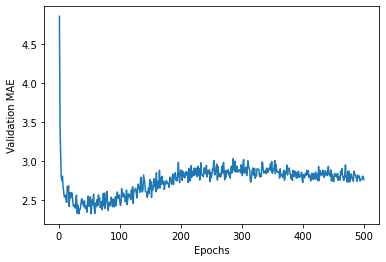

In [16]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()